<a href="https://colab.research.google.com/github/Arju-Jawla/Wind_Speed/blob/main/WIND_FIELD_02_CORRELATION_BY_FLATENNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Install Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install cartopy

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr, kendalltau

## 2. Loading the data

In [ ]:
file_path = '/content/drive/MyDrive/Project Learnings/Data/WIND FIELD RELATED 1923/ERA5_merged_6hrly_daily_2019-23.nc'

In [ ]:
df = xr.open_dataset(file_path)

In [ ]:
df

<xarray.Dataset> Size: 3GB
Dimensions:         (valid_time: 7304, latitude: 121, longitude: 81)
Coordinates:
    expver          (valid_time) object 58kB ...
  * valid_time      (valid_time) datetime64[ns] 58kB 2019-01-01 ... 2023-12-3...
  * latitude        (latitude) float64 968B 30.0 29.75 29.5 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 648B 80.0 80.25 80.5 ... 99.75 100.0
    number          int32 4B ...
Data variables:
    u10             (valid_time, latitude, longitude) float32 286MB ...
    v10             (valid_time, latitude, longitude) float32 286MB ...
    blh             (valid_time, latitude, longitude) float32 286MB ...
    cape            (valid_time, latitude, longitude) float32 286MB ...
    d2m             (valid_time, latitude, longitude) float32 286MB ...
    fsr             (valid_time, latitude, longitude) float32 286MB ...
    geo             (valid_time, latitude, longitude) float32 286MB ...
    msl             (valid_time, latitude, longitude) float32 286MB ...
    t2m             (valid_time, latitude, longitude) float32 286MB ...
    wind_magnitude  (valid_time, latitude, longitude) float32 286MB ...
    RH              (valid_time, latitude, longitude) float32 286MB ...
    spg             (valid_time, latitude, longitude) float32 286MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-12T10:19 GRIB to CDM+CF via cfgrib-0.9.1...

## 3. A rough map

Text(0, 0.5, 'Latitude')

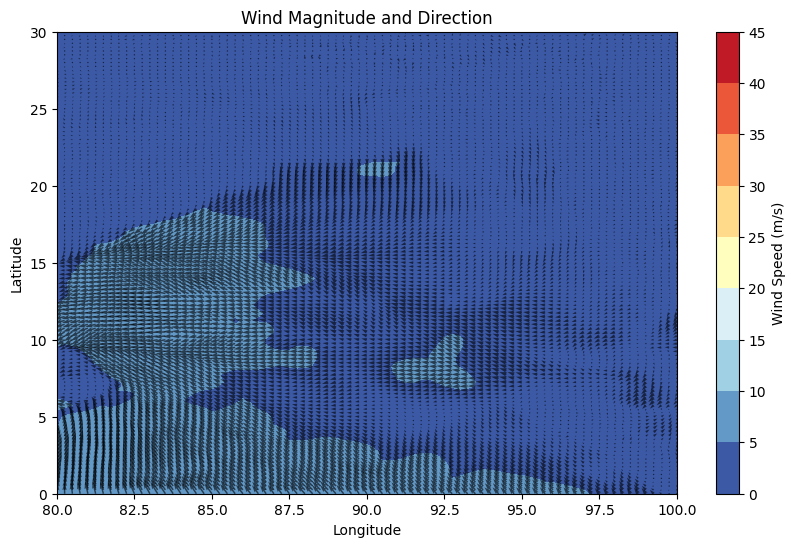

In [ ]:
# Get data for a specific time step
wind_magnitude = df['wind_magnitude'].isel(valid_time=1204)  # First time point
u10 = df['u10'].isel(valid_time=1204)  # u component
v10 = df['v10'].isel(valid_time=1204)  # v component
lat = df['latitude']
lon = df['longitude']

# Create the plot
plt.figure(figsize=(10, 6))

#Contour plot of wind magnitude
contour = plt.contourf(lon, lat, wind_magnitude, levels=np.arange(0, 50, 5), cmap='RdYlBu_r')
plt.colorbar(contour, label="Wind Speed (m/s)")
plt.quiver(lon, lat, u10, v10, scale=400, color='k', alpha=0.6)
plt.title("Wind Magnitude and Direction")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

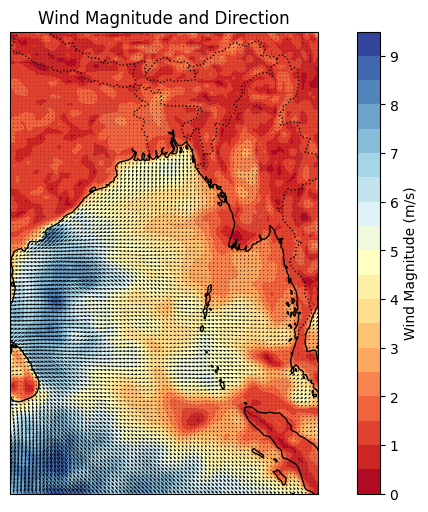

In [ ]:
# Create a meshgrid for lat/lon
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Plot setup
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))
ax.set_extent([80, 100, 0, 30], crs=ccrs.PlateCarree())  # Specify map bounds

# Add features (e.g., coastlines, borders)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Contour plot for wind magnitude
contour = ax.contourf(lon_grid, lat_grid, wind_magnitude, levels=20, cmap='RdYlBu', transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', label="Wind Magnitude (m/s)")

# Quiver plot for wind direction
ax.quiver(lon_grid, lat_grid, u10, v10, scale=400, color='black', transform=ccrs.PlateCarree())

# Labels and title
ax.set_title("Wind Magnitude and Direction")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show plot
plt.show()

## 4. Correlation Analysis

In [ ]:
wind = df['wind_magnitude']
blh = df['blh']
cape = df['cape']
fsr = df['fsr']
geo = df['geo']
t2m = df['t2m']
RH = df['RH']
spg = df['spg']

### 4.1 Flattening the data

In [ ]:
wind_flat = wind.values.flatten()
blh_flat = blh.values.flatten()
cape_flat = cape.values.flatten()
fsr_flat = fsr.values.flatten()
geo_flat = geo.values.flatten()
t2m_flat = t2m.values.flatten()
RH_flat = RH.values.flatten()
spg_flat = spg.values.flatten()

### 4.2 Calculating Pearson Correlation Coefficient

In [ ]:
corr_blh, _ = pearsonr(wind_flat, fsr_flat)
corr_cape, _ = pearsonr(wind_flat, cape_flat)
corr_fsr, _ = pearsonr(wind_flat, fsr_flat)
corr_geo, _ = pearsonr(wind_flat, geo_flat)
corr_t2m, _ = pearsonr(wind_flat, t2m_flat)
corr_RH, _ = pearsonr(wind_flat, RH_flat)
corr_spg, _ = pearsonr(wind_flat, spg_flat)

### 4.3 Calculating Spearman Correlation Coefficient

In [ ]:
corr_blh_spearman, _ = spearmanr(wind_flat, blh_flat)
corr_cape_spearman, _ = spearmanr(wind_flat, cape_flat)
corr_fsr_spearman, _ = spearmanr(wind_flat, fsr_flat)
corr_geo_spearman, _ = spearmanr(wind_flat, geo_flat)
corr_t2m_spearman, _ = spearmanr(wind_flat, t2m_flat)
corr_RH_spearman, _ = spearmanr(wind_flat, RH_flat)
corr_spg_spearman, _ = spearmanr(wind_flat, spg_flat)

### 4.4 Calculating kendall Correlation Coefficient

In [ ]:
corr_blh_kendall, _ = kendalltau(wind_flat, blh_flat)
corr_cape_kendall, _ = kendalltau(wind_flat, cape_flat)
corr_fsr_kendall, _ = kendalltau(wind_flat, fsr_flat)
corr_geo_kendall, _ = kendalltau(wind_flat, geo_flat)
corr_t2m_kendall, _ = kendalltau(wind_flat, t2m_flat)
corr_RH_kendall, _ = kendalltau(wind_flat, RH_flat)
corr_spg_kendall, _ = kendalltau(wind_flat, spg_flat)

## 5. Visualization

### 5.1 Correlation Table

In [ ]:
# Create a dictionary to store the correlation values
data = {
    'Parameter': ['blh', 'cape', 'fsr', 'geo', 't2m', 'RH', 'spg'],
    'Pearson': [corr_blh, corr_cape, corr_fsr, corr_geo, corr_t2m, corr_RH, corr_spg],
    'Spearman': [corr_blh_spearman, corr_cape_spearman, corr_fsr_spearman, corr_geo_spearman, corr_t2m_spearman, corr_RH_spearman, corr_spg_spearman],
    'Kendall': [corr_blh_kendall, corr_cape_kendall, corr_fsr_kendall, corr_geo_kendall, corr_t2m_kendall, corr_RH_kendall, corr_spg_kendall]
}

# Create a Pandas DataFrame from the dictionary
correlation_table = pd.DataFrame(data)

# Display the table
print(correlation_table)

  Parameter   Pearson  Spearman   Kendall
0       blh -0.506720  0.603351  0.453136
1      cape  0.261600  0.319312  0.216171
2       fsr -0.506720 -0.452041 -0.198962
3       geo -0.335999 -0.623194 -0.432576
4       t2m  0.323847  0.377018  0.252338
5        RH  0.112606 -0.010207  0.006310
6       spg -0.308230 -0.354305 -0.222353


### 5.2 Heatmap

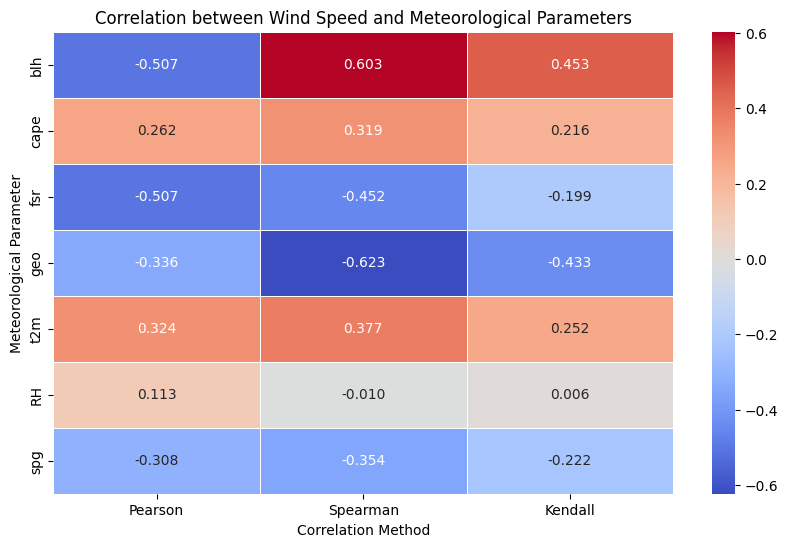

In [ ]:
# Set 'Parameter' as index
correlation = correlation_table.set_index('Parameter')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Correlation between Wind Speed and Meteorological Parameters')
plt.xlabel('Correlation Method')
plt.ylabel('Meteorological Parameter')
plt.savefig('/content/drive/MyDrive/Project Learnings/Data/WIND FIELD RELATED 1923/flatten_correlation_heatmap.png')
plt.show()

## 6. Save the data

In [ ]:
# Save the correlation table to CSV
correlation_table.to_csv('/content/drive/MyDrive/Project Learnings/Data/WIND FIELD RELATED 1923/flatten_correlation_table.csv', index=False)